Shortest path(user): 0 to user 2000: [0, 58, 1912, 2000]
All connections (user): 0 using DFS: [0, 1, 48, 30, 9, 3, 25, 21, 13, 26, 40, 29, 16, 82, 56, 55, 67, 10, 142, 31, 7, 22, 87, 5, 122, 45, 104, 98, 59, 118, 65, 203, 50, 109, 119, 27, 54, 53, 24, 57, 80, 88, 73, 126, 260, 160, 170, 62, 96, 133, 141, 38, 117, 77, 231, 106, 169, 103, 136, 120, 247, 277, 39, 69, 105, 148, 113, 66, 134, 132, 72, 165, 121, 206, 178, 186, 123, 200, 75, 85, 156, 188, 79, 185, 271, 63, 261, 172, 128, 150, 64, 100, 163, 173, 34, 348, 107, 58, 171, 189, 217, 324, 199, 161, 213, 130, 191, 204, 92, 94, 101, 180, 187, 194, 196, 249, 242, 158, 60, 239, 176, 290, 280, 153, 232, 212, 252, 223, 211, 222, 238, 265, 84, 51, 23, 61, 193, 8, 91, 110, 259, 201, 245, 264, 83, 237, 99, 68, 143, 35, 46, 175, 19, 17, 41, 14, 20, 2, 115, 28, 116, 140, 137, 32, 93, 111, 44, 312, 144, 149, 162, 326, 214, 230, 70, 71, 307, 97, 182, 253, 289, 333, 226, 343, 151, 310, 167, 243, 216, 337, 220, 262, 305, 279, 192, 49, 241, 255, 52

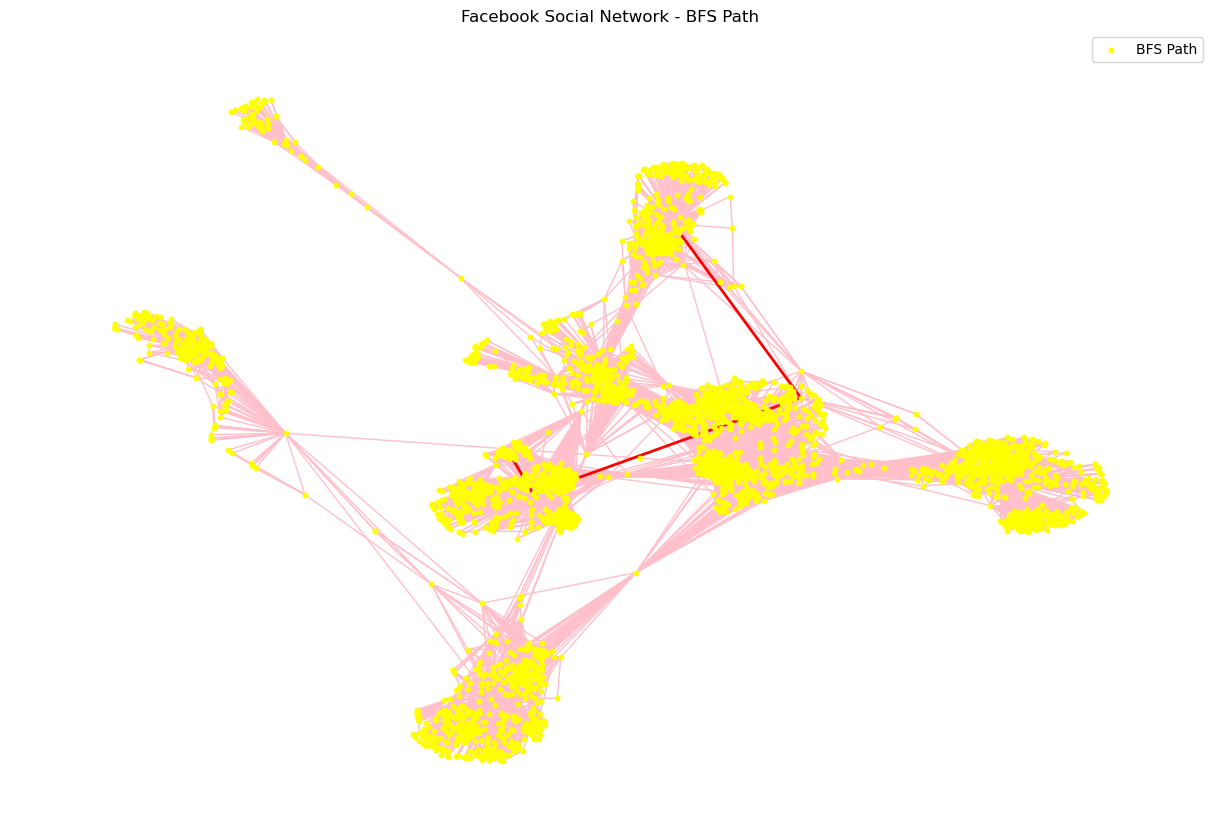

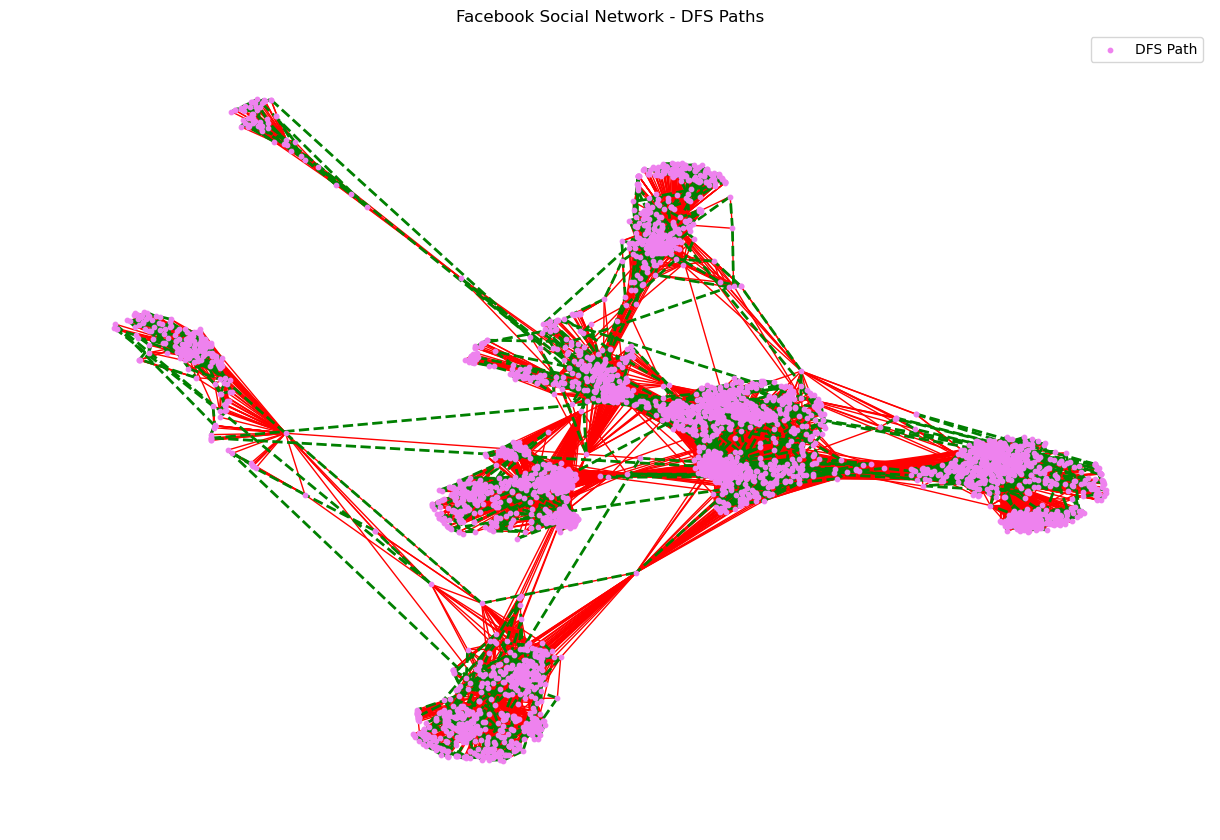

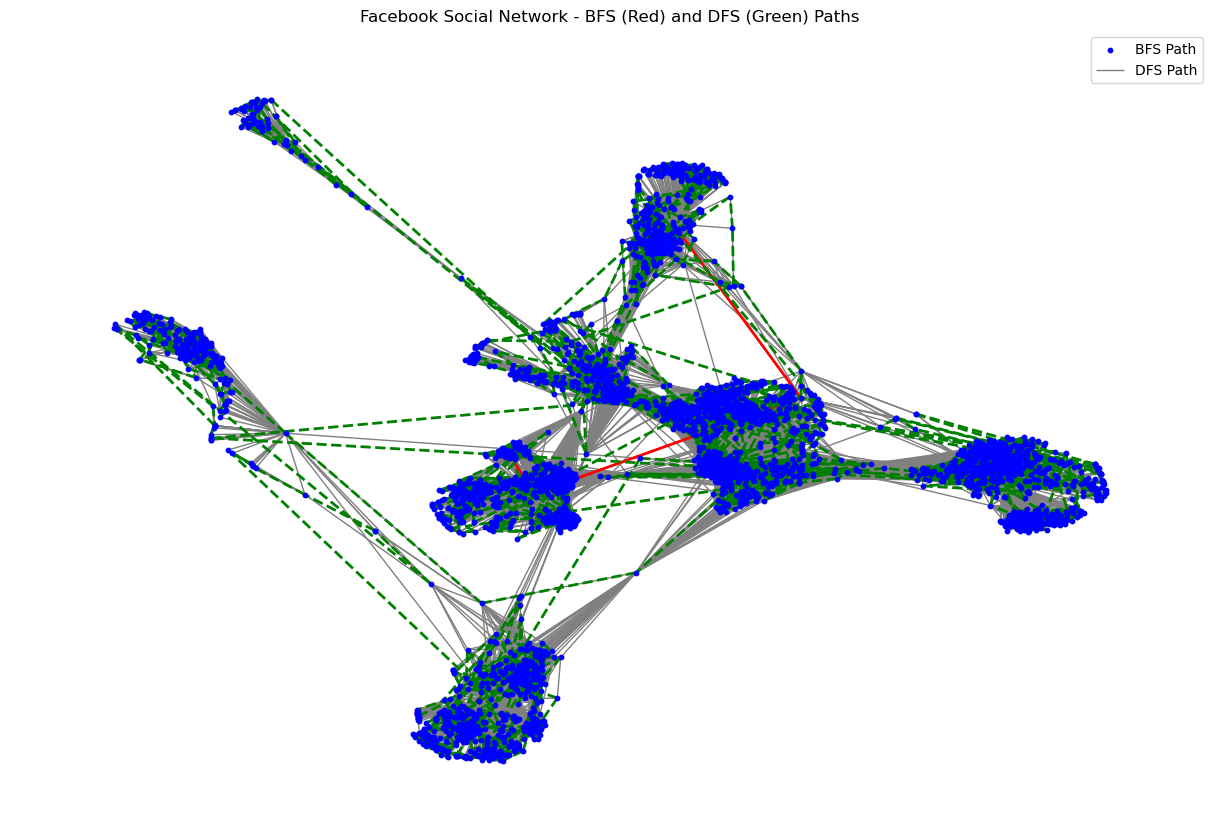

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
G = nx.read_edgelist(r'C:\Users\samay\Downloads\facebook_combined.txt.gz', delimiter=' ', create_using=nx.Graph(), nodetype=int)


def bfs_shortest_path(graph, start, goal):
    try:
        path = nx.shortest_path(graph, source=start, target=goal)
        return path
    except nx.NetworkXNoPath:
        return None
def dfs_explore(graph, start):
    visited = list(nx.dfs_preorder_nodes(graph, source=start))
    return visited


start_user = 0
goal_user = 2000

shortest_path = bfs_shortest_path(G, start_user, goal_user)
print(f"Shortest path(user): {start_user} to user {goal_user}: {shortest_path}")


dfs_connections = dfs_explore(G, start_user)
print(f"All connections (user): {start_user} using DFS: {dfs_connections}")


plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=10, node_color='yellow', edge_color='pink', with_labels=False)

if shortest_path:
    bfs_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color='red', width=2, label='BFS Path')

plt.title('Facebook Social Network - BFS Path')
plt.legend(['BFS Path'])
plt.show()


plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_size=10, node_color='violet', edge_color='red', with_labels=False)

dfs_edges = [(dfs_connections[i], dfs_connections[i+1]) for i in range(len(dfs_connections)-1)]
nx.draw_networkx_edges(G, pos, edgelist=dfs_edges, edge_color='green', width=2, style='dashed', label='DFS Path')

plt.title('Facebook Social Network - DFS Paths')
plt.legend(['DFS Path'])
plt.show()


plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_size=10, node_color='blue', edge_color='gray', with_labels=False)

if shortest_path:
    nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color='red', width=2, label='BFS Path')

nx.draw_networkx_edges(G, pos, edgelist=dfs_edges, edge_color='green', width=2, style='dashed', label='DFS Path')

plt.title('Facebook Social Network - BFS (Red) and DFS (Green) Paths')
plt.legend(['BFS Path', 'DFS Path'])
plt.show()